In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\r.bennetayeb\AppData\Local\Temp\ipykernel_25332\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [2]:
%matplotlib notebook
%matplotlib inline
import os
import shutil
import pandas as pd
import scipy

import numpy as np
import matplotlib.pyplot as plt
import kagglehub

import seaborn as sns
import streamlit as st

C:\Users\e2201621\.conda\envs\projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [3]:
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

path = os.path.normpath(path)

df = pd.read_csv(r"C:\SAE 6-01\projet_notebook\ds_salaries.csv")
print(df)

Path to dataset files: C:\Users\e2201621\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1
      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021           

##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [4]:
# Répertoire cible dans votre projet
project_dir = r"C:/SAE 6-01\projet_notebook"

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r"C:/SAE 6-01/projet_notebook/ds_salaries.csv"
shutil.copy(cache_file, project_dir)

SameFileError: 'C:/SAE 6-01/projet_notebook/ds_salaries.csv' and 'C:/SAE 6-01\\projet_notebook\\ds_salaries.csv' are the same file

In [5]:
# Lire le fichier depuis le répertoire du projet
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [6]:
#données manquantes 
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

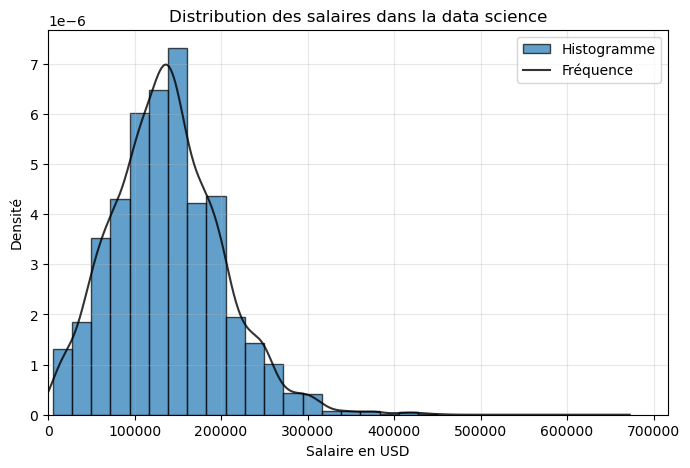

In [16]:
# Distribution des salaires en USD
fig, ax = plt.subplots(figsize=(8, 5))

df["salary_in_usd"].plot.hist(bins=20, edgecolor='black', linewidth=1, alpha=0.7, ax=ax, label="Histogramme", density=True)
df["salary_in_usd"].plot.density(color='k', alpha=0.8, ax=ax, label="Fréquence")

ax.set_xlim(left=0)  

plt.title('Distribution des salaires dans la data science')
plt.xlabel('Salaire en USD')
plt.ylabel('Densité')

plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [17]:
# liste des pays concerné par l'étude 
pd.unique(df["company_location"])

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [33]:
#Salaire moyen par rôle
df.groupby(by="job_title")[['salary_in_usd']].mean()

# Salaire moyen par pays
df.groupby(by="company_location")[['salary_in_usd']].mean()

# Salaires moyens par niveau d'expérience
df.groupby(by="experience_level")[['salary_in_usd']].mean()

,salary_in_usd
experience_level,
EN,78546.284375
EX,194930.929825
MI,104525.939130
SE,153051.071542


#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [43]:
# Filtrer les salaires pour un pays donné (ex : US)
df[df["company_location"] == "US"]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country_location
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,US
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,US
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L,US
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L,US
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M,US
...,...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L,US
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,US
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,US
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,US


In [54]:
# Top 5 des entreprises qui paient le plus
print(df.groupby(by="company_location")[['salary_in_usd']].mean().sort_values(by = "salary_in_usd",ascending= False).head())

                  salary_in_usd
company_location               
IL                271446.500000
PR                167500.000000
US                151822.009539
RU                140333.333333
CA                131917.689655


In [68]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
salaire_100 = df.groupby(by="job_title")[['salary']].mean()
print(salaire_100[salaire_100["salary"] > 100])
# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
top_visio = df.groupby(by="company_location")[['remote_ratio']].mean()
print(top_visio[top_visio["remote_ratio"] == 100])

                                      salary
job_title                                   
3D Computer Vision Researcher  120000.000000
AI Developer                   137181.818182
AI Programmer                   55000.000000
AI Scientist                   275312.500000
Analytics Engineer             151352.621359
...                                      ...
Research Engineer              162752.810811
Research Scientist             160768.890244
Software Data Engineer          75000.000000
Staff Data Analyst              15000.000000
Staff Data Scientist           105000.000000

[93 rows x 1 columns]
                  remote_ratio
company_location              
AR                       100.0
CF                       100.0
CL                       100.0
CR                       100.0
EG                       100.0
IR                       100.0
KE                       100.0
MY                       100.0
NG                       100.0
PH                       100.0
PL                  

In [79]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
df2 = df[df["remote_ratio"] == 100]
print(df2['salary_in_usd'].mean())
# Comparer salaires moyens pour deux catégories
df3 = df[df["job_title"] == "Data Specialist"]
df4 = df[df["job_title"] == "Business Data Analyst"]
print("Salaire moyen d'un Data Specialist :", df3['salary_in_usd'].mean(), "\nSalaire moyen d'un Business Data Analyst :", df4['salary_in_usd'].mean())

136481.45283018867
Salaire moyen d'un Data Specialist : 119642.85714285714 
Salaire moyen d'un Business Data Analyst : 66065.4


In [84]:
# Ajouter une colonne pour les fourchettes de salaires

df["fork_salary"] = pd.cut(df["salary_in_usd"],
    bins=[0, 50000, 100000, 150000, float("inf")],
    labels=["<50k", "50k-100k", "100k-150k", "150k+"], right=False 
)

print(df[["salary_in_usd", "fork_salary"]].head())

   salary_in_usd fork_salary
0          85847    50k-100k
1          30000        <50k
2          25500        <50k
3         175000       150k+
4         120000   100k-150k


In [85]:
# Analyse des corrélations
# Relation entre télétravail et salaire
df['remote_ratio'].corr(df['salary_in_usd'])

-0.06417098519057557

In [86]:
# Salaire moyen par taille d'entreprise
df.groupby(by="company_size")[['salary_in_usd']].mean()

,salary_in_usd
company_size,
L,118300.982379
M,143130.548367
S,78226.682432


In [90]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = df.pivot_table(
    index='experience_level', 
    columns='remote_ratio', 
    values='salary_in_usd', 
    aggfunc='mean'
)
print("Tableau croisé des salaires :")
print(pivot_table)

Tableau croisé des salaires :
remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
